# Convolution

## Interactive visualization of convolution of any 2 functions

### Various functions can be selected and their folding can be displayed.

#### Functions:
#### - rectangular

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.square.html

#### - Gaussian - Function)
https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.norm.html

#### - Gamma - Function
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html?highlight=gamma#scipy.special.gamma
#### - Poisson - Function
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson

In [12]:
# resourcen
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.special import gamma, factorial
from scipy.stats import poisson, norm

#set backend for interactive toolbar
%matplotlib nbagg

In [13]:
#presets
x = np.linspace(-5,5,1000)

In [14]:
# definie functions
    
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.square.html
def getRect(f,time):
    return(signal.square(2*np.pi*f*time))
#         return(np.where(abs(x)<=0.5, 1, 0))
       
def getGauss(sigm, mu, time):
#         return(1/(sigm * np.sqrt(2 * np.pi)) * np.exp(-0.5*((x-mu)/sigm)**2))
#         normal distribution with parameters
    nv = norm(mu, sigm)
#         return probability density function:
    return(nv.pdf(time))
    
#     https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson
def getPoisson(mu):
    xp = np.arange(poisson.ppf(0.01,mu), poisson.ppf(0.99,mu))
    return(xp, poisson.pmf(xp,mu))
    
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html?highlight=gamma#scipy.special.gamma
def getGamma(time):
    return(gamma(time))

In [15]:
#interactive controls

signalForms = ['rectangular', 'gaussian', 'poisson','gamma']
signal_select_left = widgets.Select(description='', options=signalForms, value='rectangular')
signal_select_right = widgets.Select(description='', options=signalForms, value='rectangular')

placeholder = widgets.Select(disabled = True, layout = widgets.Layout(width='35%', heigth='auto'))

#Sliders

# left Signal
mu_1 = widgets.FloatSlider(min=-5, max=5, value=0, description="µ:")
sigm_1 = widgets.FloatSlider(min=0.1, max=5, value=1, description='$\sigma$:')
frq_1 = widgets.FloatSlider(min=0, max=10, value=0.1, step=0.1, description='$f_1$: in Hz')
mu_poisson_1 = widgets.FloatSlider(min=0.1, max=500, value = 0.5, description='$µ_{poisson}:$')

# right Signal

mu_2 = widgets.FloatSlider(min=-5, max=5, value=0, description="µ :")
sigm_2 = widgets.FloatSlider(min=0.1, max=5, value=1, description='$\sigma$:')
frq_2 = widgets.FloatSlider(min=0, max=10, value=0.1, step=0.1, description='$f_2$: in Hz')
mu_poisson_2 = widgets.FloatSlider(min=0.1, max=500, value = 0.5, description='$µ_{poisson}:$')

xrng_1 = widgets.FloatRangeSlider(min=-15, max=15, value=[-5,5], step=0.5, description='$x_{range}$',\
                                  layout= widgets.Layout(width='50%',height='auto'))

<IPython.core.display.Javascript object>


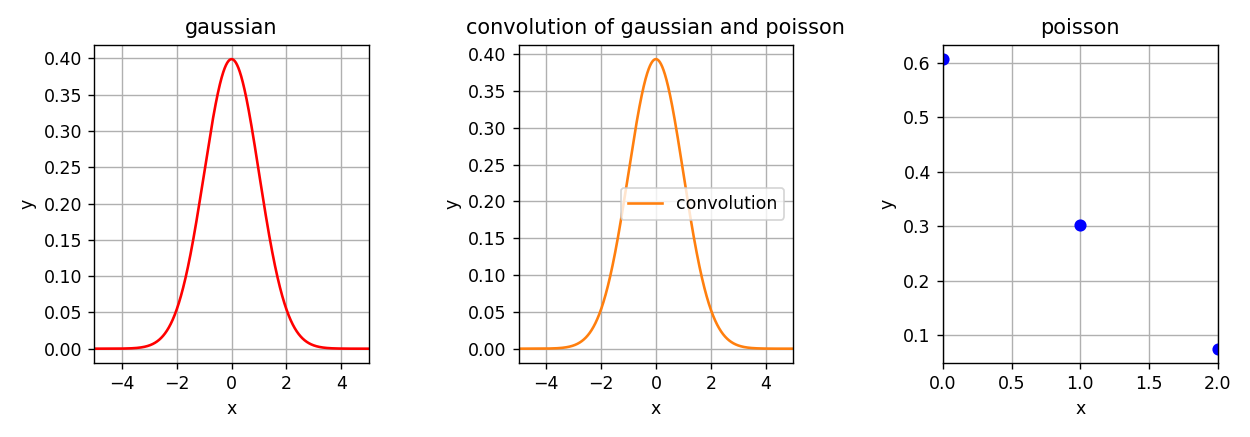

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3.5))

# 1. create a callback which updates the plot when a control-value has changed
def update_view(*args):

    # selections
    
    signaltype_left = signal_select_left.value
    signaltype_right = signal_select_right.value
        
    # update time base
    x = np.linspace(xrng_1.value[0], xrng_1.value[-1], 5000)
        
    #-----------------------------------------------------------
    # compute signal according the selections
        
    poisson_left = False
    poisson_right = False
        
    if (signaltype_left == "rectangular"):
        frq_1.disabled = False
        mu_poisson_1.disabled = True
        mu_1.disabled = True
        sigm_1.disabled = True
        sLeft = getRect(frq_1.value,x,)
        
    if (signaltype_left == "gaussian"):
        mu_1.disabled = False
        sigm_1.disabled = False
        mu_poisson_1.disabled = True
        frq_1.disabled = True
        sLeft = getGauss(sigm_1.value, mu_1.value, x)
        
    if (signaltype_left == "poisson"):
        mu_poisson_1.disabled = False
        mu_1.disabled = True
        sigm_1.disabled = True
        frq_1.disabled = True
        poisson_left = True
        xpl, sLeft = getPoisson(mu_poisson_1.value)
        
    if (signaltype_left == "gamma"):
        mu_poisson_1.disabled = True
        mu_1.disabled = True
        sigm_1.disabled = True
        frq_1.disabled = True
        sLeft = getGamma(x)
            
    if (signaltype_right == "rectangular"):
        frq_2.disabled = False
        mu_poisson_2.disabled = True
        mu_2.disabled = True
        sigm_2.disabled = True
        sRight = getRect(frq_2.value, x)
        
    if (signaltype_right == "gaussian"):
        frq_2.disabled = True
        mu_2.disabled = False
        sigm_2.disabled = False
        mu_poisson_2.disabled = True
        sRight = getGauss(sigm_2.value, mu_2.value, x)
            
    if (signaltype_right == "poisson"):
        mu_poisson_2.disabled = False
        mu_2.disabled = True
        sigm_2.disabled = True
        frq_2.disabled = True
        poisson_right = True
        xpr, sRight = getPoisson(mu_poisson_2.value)
    
    if (signaltype_right == "gamma"):
        mu_poisson_2.disabled = True
        mu_2.disabled = True
        sigm_2.disabled = True
        frq_2.disabled = True
        sRight = getGamma(x)
            
#-----------------------------------------------------------
# compute convolution

#     print(\"signal lengths: left: {}\\tright:{}\".format(len(sLeft),len(sRight)))
    falt_same = np.convolve(sLeft,sRight,'same')
        
    #-----------------------------------------------------------
    # update figures
        
    # fig_1: left function
    axes[0].clear()
    axes[0].set_title("{}".format(signaltype_left))
    if (poisson_left):
        axes[0].plot(xpl, sLeft, 'ro', label="{}".format(signaltype_left))
        axes[0].set_xlim(xpl[0], xpl[-1])
    else:
        axes[0].plot(x,sLeft, linestyle='-', color='r', label="{}".format(signaltype_left))
        axes[0].set_xlim(x[0], x[-1])
        
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y")
    axes[0].grid(True)
        
    # fig_2: convolution
    axes[1].clear()
    axes[1].set_title("convolution of {} and {}".format(signaltype_left,signaltype_right))
    if (poisson_left & poisson_right):
        axes[1].plot(falt_same, linestyle='dashdot', color='C1', label="convolution")
    else:
        axes[1].plot(x, falt_same,color='C1',label="convolution")
        axes[1].set_xlim(x[0], x[-1])
    
    axes[1].set_xlabel("x")
    axes[1].set_ylabel("y")
    axes[1].legend(loc="best")
    axes[1].grid(True)
        
    # fig_3: right signal
    axes[2].clear()
    axes[2].set_title("{}".format(signaltype_right))
    if poisson_right:
        axes[2].plot(xpr, sRight, 'bo', label="{}".format(signaltype_left))
        axes[2].set_xlim(xpr[0], xpr[-1])
    else:
        axes[2].plot(x, sRight, linestyle='-', color='b', label="{}".format(signaltype_right))
        axes[2].set_xlim(x[0], x[-1])
    
    axes[2].set_xlabel("x")
    axes[2].set_ylabel("y")
    axes[2].grid(True)
        
    fig.tight_layout()
    
#--------------------------------------------------------
# 2. register the callback by using the 'observe' method
    
signal_select_left.observe(update_view, 'value')
signal_select_right.observe(update_view,'value')
mu_1.observe(update_view,'value')
sigm_1.observe(update_view,'value')
frq_1.observe(update_view,'value')
frq_2.observe(update_view,'value')
mu_2.observe(update_view,'value')
sigm_2.observe(update_view,'value')
mu_poisson_1.observe(update_view,'value')
mu_poisson_2.observe(update_view,'value')
xrng_1.observe(update_view,'value')
#
#--------------------------------------------------------
# run app

# force diagram drawing
update_view()
# arange controls with 'widgets.VBox / .HBox'

box_layout = widgets.Layout(display='inline-flex',flex_flow='row',align_items='flex-start',width='90%')

menus = widgets.HBox([widgets.VBox([signal_select_left,frq_1,mu_1,sigm_1,mu_poisson_1]),\
                      placeholder,\
                      widgets.VBox([signal_select_right,frq_2,mu_2,sigm_2,mu_poisson_2])\
                     ], layout= box_layout)

widgets.VBox([menus, xrng_1], layout=widgets.Layout(display='flex',flex_flow='column', align_items='center'))